In [1]:
import pandas as pd 
import os
os.chdir('/home/spankaew/Git/astrologics')
import astrologics as le
import seaborn as sns
import matplotlib.pyplot as plt

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# Load model path into logic_ensemble object

In [2]:
model_path = '/home/spankaew/Git/astrologics/models/Invasion/'
model = le.LogicEnsemble(model_path, project_name = 'Invasion')
model.create_simulation()

Simulation object created


# Calculate attractors from the model cohorts
In this part of the script, we calculate attractors from cohorts of model, and compared using clustermap

In [3]:
model.create_attractor()
model.attractor.get_attractors()
model.attractor.attractors_df

Attractor object created


100%|██████████| 88/88 [00:03<00:00, 23.92it/s]


Concatenate results into matrix


100%|██████████| 88/88 [00:00<00:00, 1924.56it/s]

Attractors calculation completed



/home/spankaew/Git/astrologics/astrologics/model_attractors.py:85: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.attractors_df = model_logic.fillna(0)


bn45  bn8  bn12  bn65  bn42  bn60  bn70  bn28  bn63  bn73  bn87  \
000000000000     1    1     1     1     1     1     1     1     1     1     1   
010100100011     1    1     1     1     1     1     1     1     1     1     1   
001011101000     1    1     0     1     0     1     0     1     0     0     1   
101000110100     1    1     1     1     1     1     1     1     1     1     1   
001001101000     0    0     1     0     1     0     1     0     1     1     0   

              bn58  bn74  bn11  bn30  bn16  bn3  bn41  bn32  bn85  bn82  bn53  \
000000000000     1     1     1     1     1    1     1     1     1     1     1   
010100100011     1     1     1     1     1    1     1     1     1     1     1   
001011101000     0     1     1     0     1    1     0     0     1     1     1   
101000110100     1     1     1     1     1    1     1     1     1     1     1   
001001101000     1     0     0     1     0    0     1     1     0     0     0   

              bn62  bn4  bn39  bn64  bn27  bn61  bn7  bn14  bn57  bn20  bn18  \
000000000000     1    1     1     1     1     1    1     1     1     1     1   
010100100011     1    1     1     1     1     1    1     1     1     1     1   
001011101000     0    0     0     1     1     0    1     1     0     1     0   
101000110100     1    1     1     1     1     1    1     1     1     1     1   
001001101000     1    1     1     0     0     1    0     0     1     0     1   

              bn54  bn25  bn24  bn67  bn38  bn29  bn72  bn50  bn31  bn5  bn49  \
000000000000     1     1     1     1     1     1     1     1     1    1     1   
010100100011     1     1     1     1     1     1     1     1     1    1     1   
001011101000     0     0     1     0     0     0     1     0     0    0     0   
101000110100     1     1     1     1     1     1     1     1     1    1     1   
001001101000     1     1     0     1     1     1     0     1     1    1     1   

              bn35  bn37  bn0  bn81  bn83  bn79  bn80  bn75  bn9  bn46  bn26  \
000000000000     1     1    1     1     1     1     1     1    1     1     1   
010100100011     1     1    1     1     1     1     1     1    1     1     1   
001011101000     0     1    0     1     0     1     1     0    0     0     0   
101000110100     1     1    1     1     1     1     1     1    1     1     1   
001001101000     1     0    1     0     1     0     0     1    1     1     1   

              bn10  bn13  bn21  bn36  bn23  bn44  bn33  bn86  bn34  bn55  \
000000000000     1     1     1     1     1     1     1     1     1     1   
010100100011     1     1     1     1     1     1     1     1     1     1   
001011101000     1     0     1     0     0     0     0     1     0     0   
101000110100     1     1     1     1     1     1     1     1     1     1   
001001101000     0     1     0     1     1     1     1     0     1     1   

              bn40  bn84  bn2  bn6  bn59  bn52  bn77  bn47  bn17  bn68  bn76  \
000000000000     1     1    1    1     1     1     1     1     1     1     1   
010100100011     1     1    1    1     1     1     1     1     1     1     1   
001011101000     0     1    1    0     0     1     0     0     0     1     1   
101000110100     1     1    1    1     1     1     1     1     1     1     1   
001001101000     1     0    0    1     1     0     1     1     1     0     0   

              bn1  bn56  bn71  bn51  bn19  bn48  bn43  bn69  bn78  bn66  bn22  \
000000000000    1     1     1     1     1     1     1     1     1     1     1   
010100100011    1     1     1     1     1     1     1     1     1     1     1   
001011101000    0     0     0     0     1     1     0     0     0     1     1   
101000110100    1     1     1     1     1     1     1     1     1     1     1   
001001101000    1     1     1     1     0     0     1     1     1     0     0   

              bn15  
000000000000     1  
010100100011     1  
001011101000     0  
101000110100     1  
001001101000     1

This shows that actually the two differences between the model 1 and two comes from the fact that you missed one value position when computing the attractor. I'll have to revise the script for doing this better.

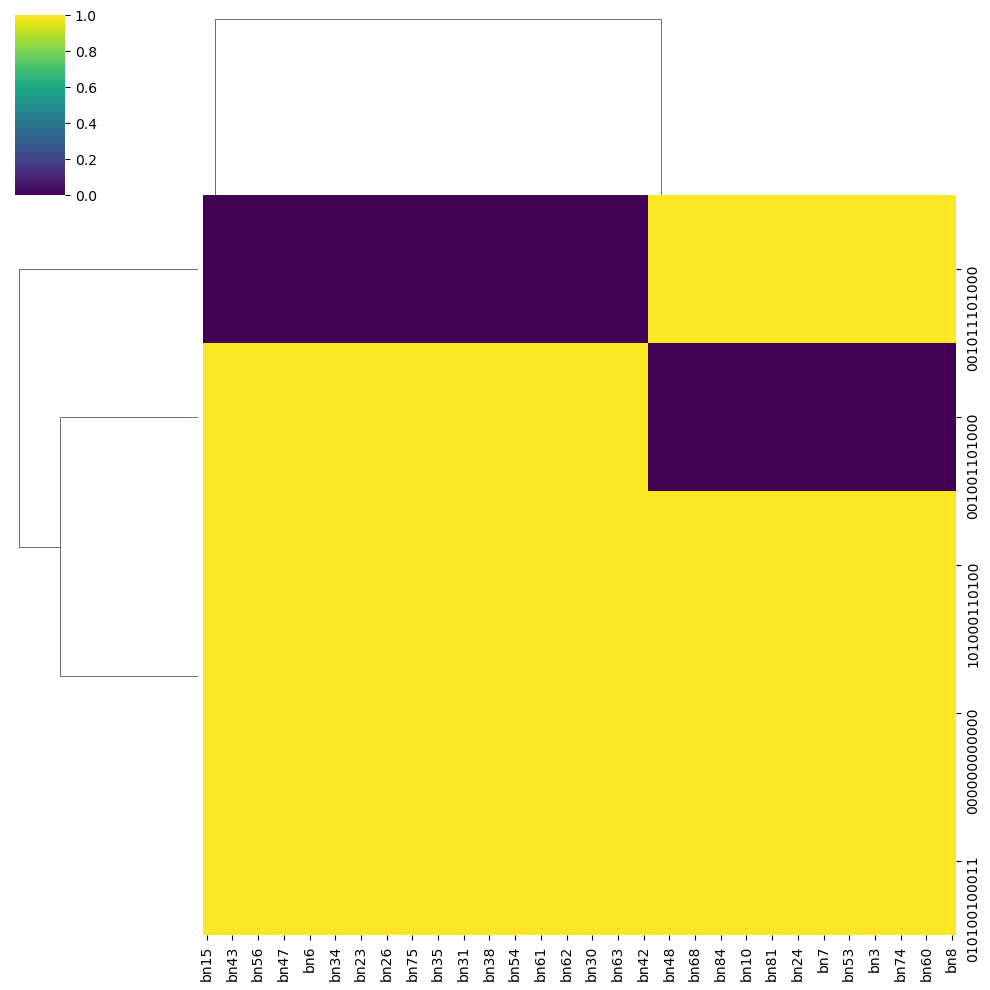

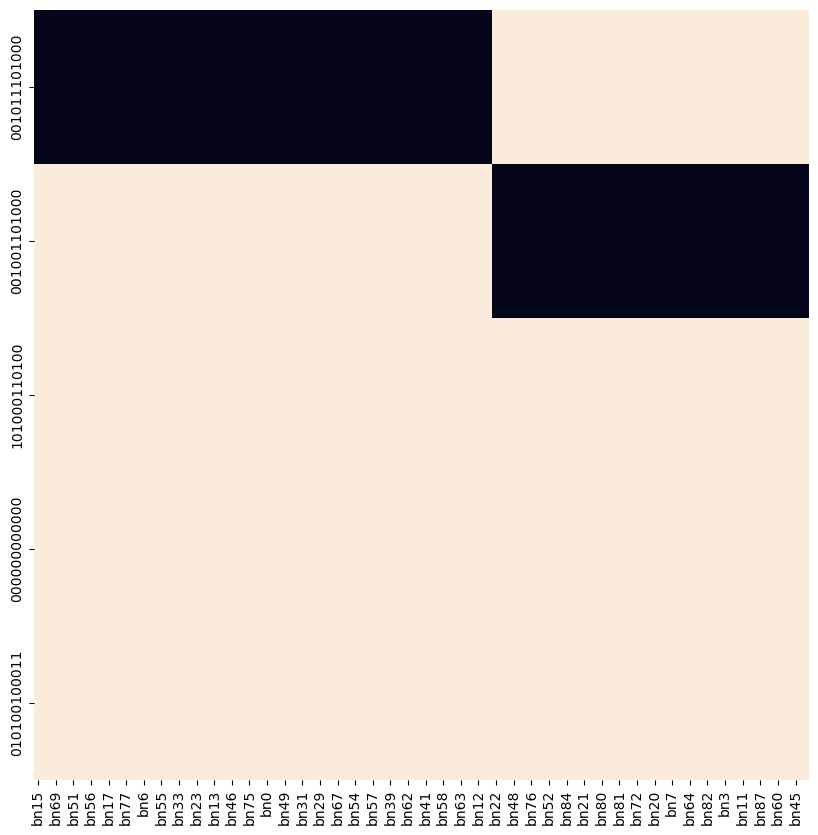

In [4]:
# Create the clustermap
clustermap = sns.clustermap(model.attractor.attractors_df, 
                            cmap='viridis', vmax=1, vmin=0, figsize=(10,10))

# Get the row and column order from the clustermap
row_order = clustermap.dendrogram_row.reordered_ind
col_order = clustermap.dendrogram_col.reordered_ind

# Reorder the dataframe
reordered_df = model.attractor.attractors_df.iloc[row_order, col_order]

# Plot the heatmap with the reordered dataframe without color bar
plt.figure(figsize=(10,10))
sns.heatmap(reordered_df, 
            #cmap='viridis', 
            vmax=1, vmin=0, cbar=False)
#plt.savefig('/home/spankaew/Git/BooleanBenchmark/figures/toy_reprogramming_AttractorHeatmap.pdf')
plt.show()
plt.close()

From `logic_ensemble` object -> you can define simulation parameters and initial condition of the simulation directly. The simulation gives the node activity at each simulation time that is stored in the object called `.simulation.simulation_df`

# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

In [4]:
# setup initial state for the simulation
initial_state = {'miR200':1,'miR203':1,'miR34':1}

In [5]:
model.simulation.update_parameters(max_time = 20,thread_count = 15, sample_count = 2000)
model.simulation.run_simulation(initial_state=initial_state)

Start simulation


100%|██████████| 1025/1025 [16:51<00:00,  1.01it/s]


Simulation completed


Trajectory object created


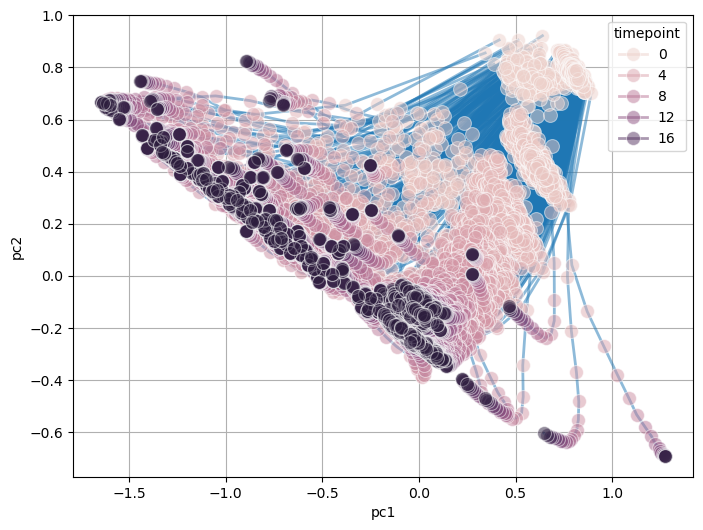

In [13]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_trajectory(color = 'timepoint', show_legend = True)

In [7]:
model.simulation.simulation_df.to_csv('/home/spankaew/Git/astrologics/tmp/Invasion_simulation_new_v2.csv',index=False)

From the visualization, we can then try to group together models with simular simulation activity via clustering. 

In `logic_ensemble`, we utilize the package called `tslearn` - a toolkit to perform analysis on time series data. 

The timeseries clustering method included in this toolkit includes : 

- euclidean

- dynamic time warping (dtw) 

- softdtw.

The calculated clustering will be embeded into the trajectory matrix

In [14]:
import numpy as np
# Setup the 
pca_df = model.trajectory.pca_df
pca_df.model_id = pca_df.model_id.astype('category')
model_name = pca_df.model_id.cat.categories

simulation_df = model.simulation.simulation_df
simulation_df.model_id = simulation_df.model_id.astype('category')
node_list = simulation_df.columns.drop(['timepoint','model_id'])

model_original_all = {}
for i in model_name:
    model_original = simulation_df.loc[simulation_df.model_id == i,node_list].values
    model_original_all[i] = np.array(model_original)
pca_all_trajectory = np.array(list(model_original_all.values()))

100%|██████████| 1025/1025 [01:03<00:00, 16.19it/s]
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hi

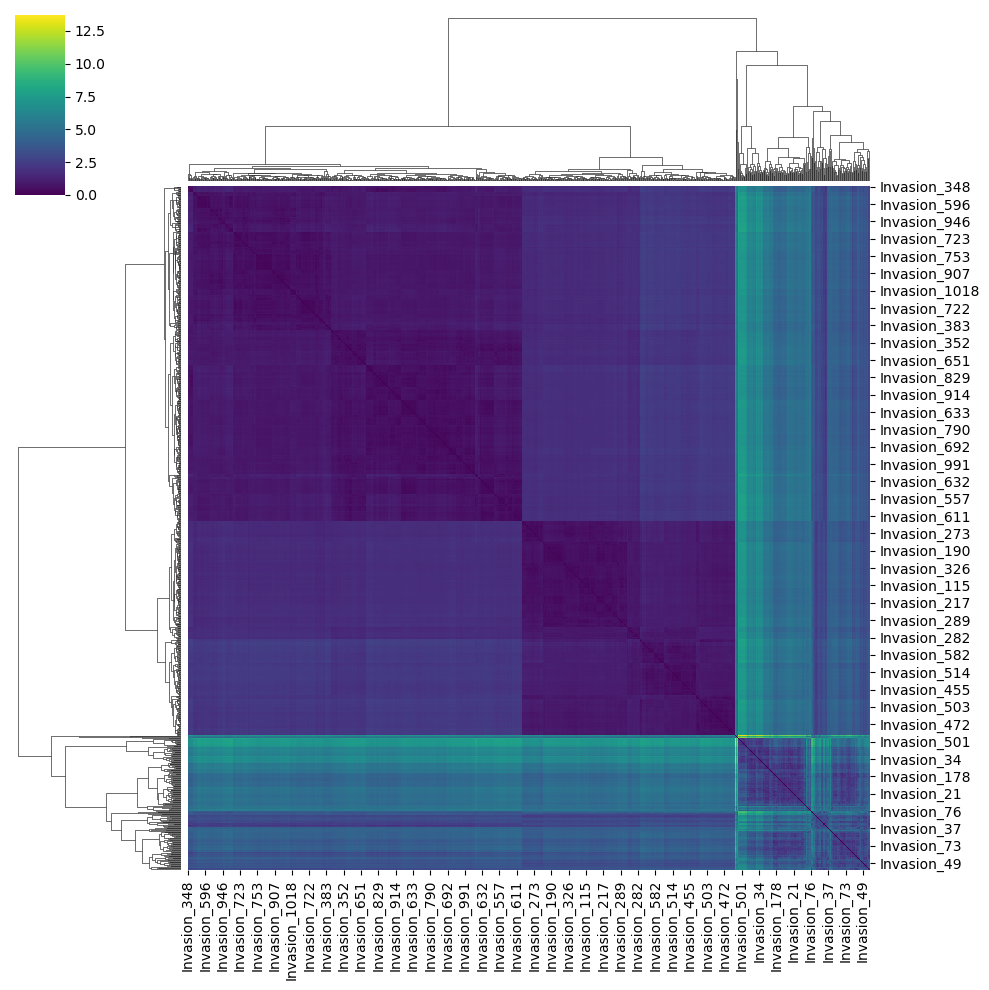

In [16]:
from tslearn.metrics import dtw
from tqdm import tqdm

# Initialize an empty distance matrix
num_trajectories = len(pca_all_trajectory)
distance_matrix = np.zeros((num_trajectories, num_trajectories))

# Calculate DTW distance for each pair of trajectories
for i in tqdm(range(num_trajectories)):
    for j in range(num_trajectories):
        distance_matrix[i, j] = dtw(pca_all_trajectory[i], pca_all_trajectory[j])

# Display the distance matrix
distance_matrix = pd.DataFrame(distance_matrix, index=model_name, columns=model_name)
sns.clustermap(distance_matrix, cmap='viridis', figsize=(10,10))

/tmp/ipykernel_36987/562331001.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


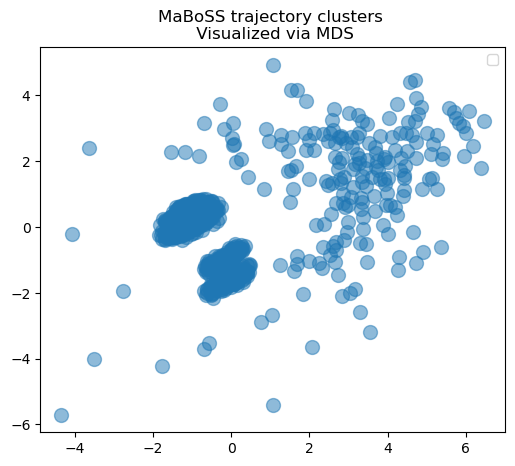

In [ ]:
# Visualize clusters with MDS
from sklearn.manifold import MDS

# Visualize clusters with MDS
#distance_matrix = model.succession_diagram.distance_matrix
mds = MDS(dissimilarity='precomputed', random_state=12345)
coords = mds.fit_transform(distance_matrix)

plt.figure(figsize=(6, 5))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5, s = 100)
plt.legend()
plt.title('MaBoSS trajectory clusters \n Visualized via MDS')
plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/InvasionTutorial_trajMDS.pdf')

plt.show()

plt.close()

In [72]:
model.trajectory.calculate_kmean_cluster(n_cluster=6, 
                                         metric = 'dtw', 
                                         data = 'original')

DTW k-means


/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1

1.697 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    0.4s


1.198 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    0.4s


1.188 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    0.4s


1.187 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    0.4s


1.187 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    0.4s


1.187 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    0.4s
/home/spankaew/Git/astrologics/astrologics/trajectory_clustering.py:222: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

/tmp/ipykernel_36987/40396508.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kmean_cluster = pca_df.groupby(['timepoint', 'kmean_cluster'])[['pc1', 'pc2']].mean()
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/relational.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, unit_data in sub_data.groupby("units"):
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/relational.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

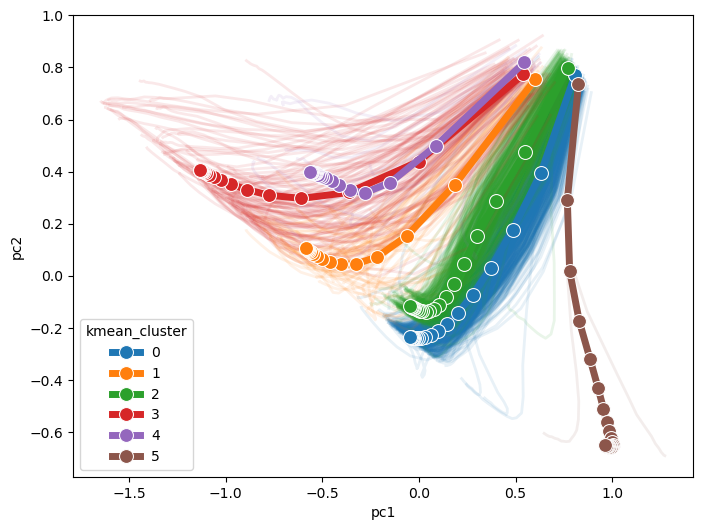

In [73]:
# Re-order the clusters from 0 to 5
pca_df['kmean_cluster'] = pd.Categorical(pca_df['kmean_cluster'], categories=[0, 1, 2, 3, 4, 5], ordered=True)

# Recalculate the mean position
kmean_cluster = pca_df.groupby(['timepoint', 'kmean_cluster'])[['pc1', 'pc2']].mean()

# Adjust figure size
plt.figure(figsize=(8, 6))

# Plot with Seaborn
plot = sns.lineplot(data=pca_df, 
                    x='pc1', y='pc2',
                    hue='kmean_cluster', units='model_id', estimator=None, lw=2, alpha=0.1,
                    sort=False, legend=False)
plot2 = sns.lineplot(data=kmean_cluster, 
                     x='pc1', y='pc2',
                     hue='kmean_cluster',
                     sort=False, marker='o', linewidth=5, markersize=10)

plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/InvasionTutorial_trajectories.pdf')
plt.show()

In [74]:
# Visualize clusters with MDS
from sklearn.manifold import MDS

# Visualize clusters with MDS
#distance_matrix = model.succession_diagram.distance_matrix
mds = MDS(dissimilarity='precomputed', random_state=12345)
coords = mds.fit_transform(distance_matrix)

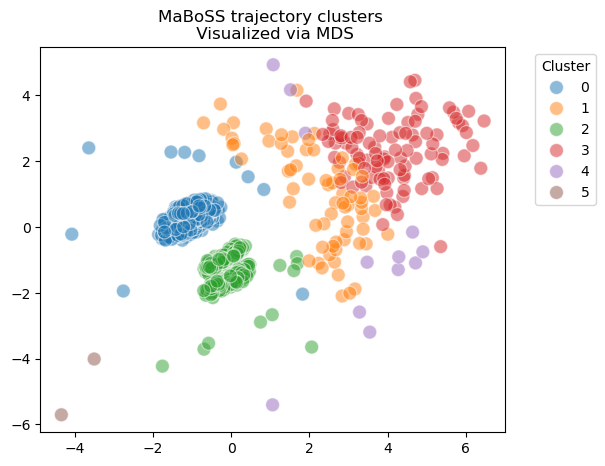

In [75]:
# Map the group colors based on the cluster dictionary
group_colors = distance_matrix.index.map(model.trajectory.cluster_dict)
group_colors = group_colors.astype('category')  # Convert to numeric codes for coloring

# Add colors to the scatter plot using seaborn
plt.figure(figsize=(6, 5))
sns.scatterplot(x=coords[:, 0], y=coords[:, 1], hue=group_colors, palette='tab10', s=100, alpha=0.5)

# Customize the plot
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('MaBoSS trajectory clusters \n Visualized via MDS')
plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/InvasionTutorial_trajMDS_trajcluster_colored_seaborn.pdf', bbox_inches='tight')

plt.show()
plt.close()

Succession diagram object created
Calculating Succession Diagrams


100%|██████████| 88/88 [00:09<00:00,  9.01it/s]


Succession Diagrams calculated


100%|██████████| 88/88 [00:00<00:00, 266.49it/s]


Creating SD networks


100%|██████████| 88/88 [00:00<00:00, 331.64it/s]


SD networks created


  0%|          | 0/88 [00:00<?, ?it/s]/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/netrd/utilities/graph.py:74: RuntimeWarning: Coercing directed graph to undirected.
  warnings.warn("Coercing directed graph to undirected.", RuntimeWarning)
100%|██████████| 88/88 [00:05<00:00, 16.34it/s]
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


SD networks distance calculated


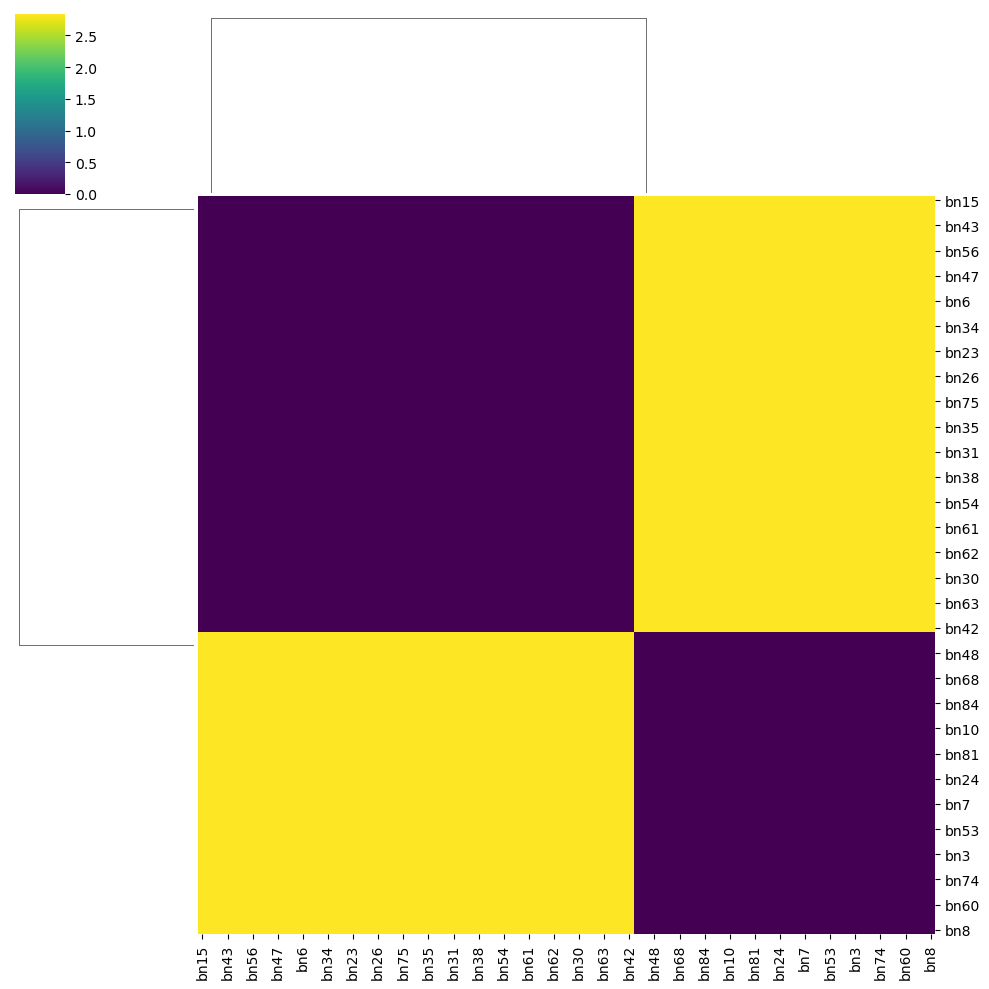

In [12]:
model.create_succession_diagram()
model.succession_diagram.calculate_succession_diagram()
model.succession_diagram.calculate_sd_states()
model.succession_diagram.create_sd_networks()
model.succession_diagram.calculate_sdnet_distance()
sns.clustermap(model.succession_diagram.distance_matrix, cmap='viridis')

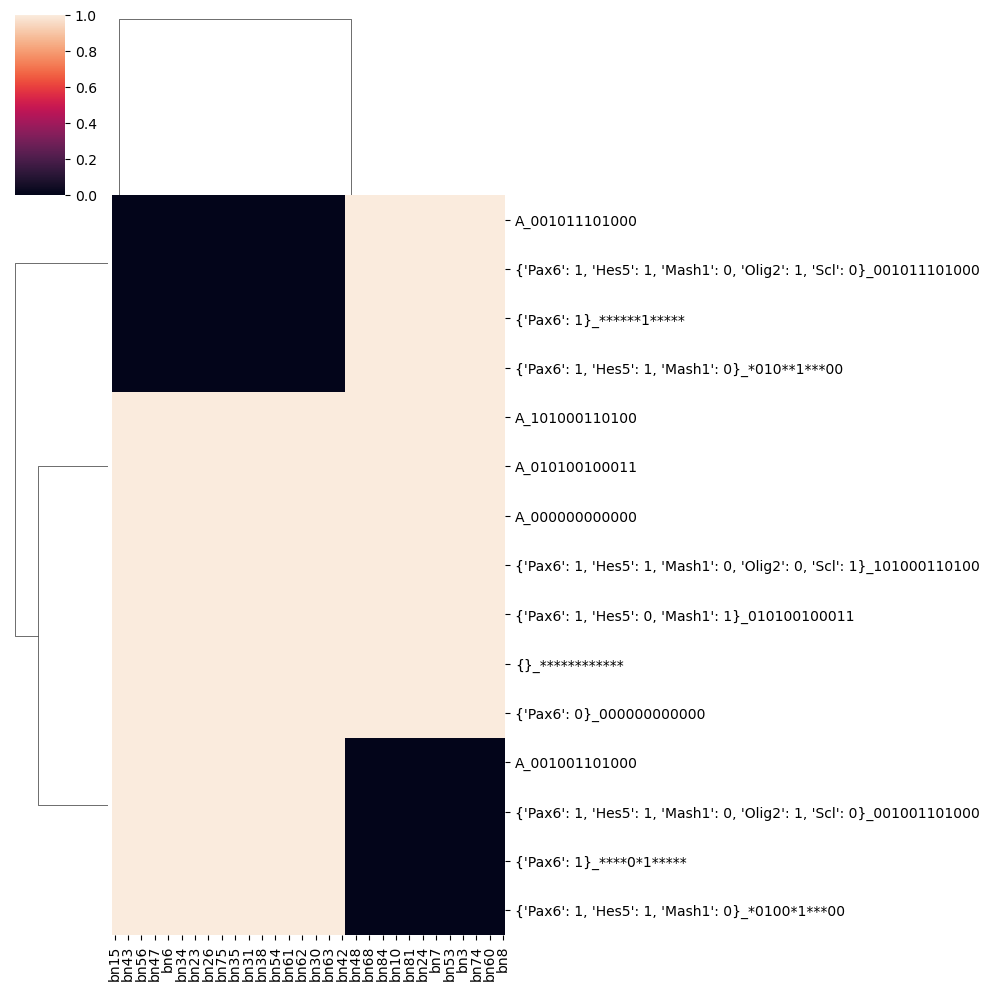

In [13]:
sns.clustermap(model.succession_diagram.states_bin)

/tmp/ipykernel_27694/788440816.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


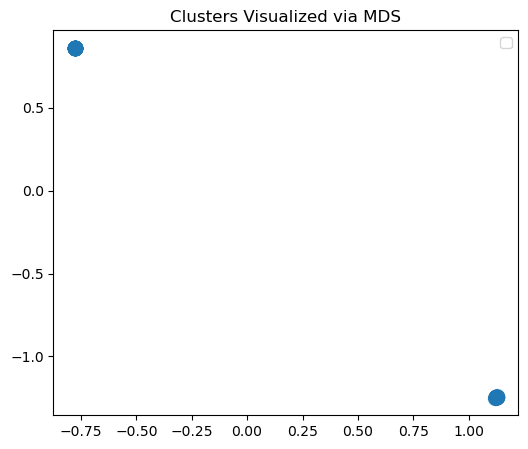

In [14]:
# Visualize clusters with MDS
distance_matrix_2 = model.succession_diagram.distance_matrix
mds = MDS(dissimilarity='precomputed', random_state=12345)
coords = mds.fit_transform(distance_matrix_2)

plt.figure(figsize=(6, 5))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5, s = 100)
plt.legend()
plt.title('Clusters Visualized via MDS')
plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/BonesisTutorial_sdMDS.pdf')

plt.show()

plt.close()

In [15]:
distance_matrix = distance_matrix.loc[model_name, model_name]
distances_1 = distance_matrix.where(np.triu(np.ones(distance_matrix.shape ,dtype = bool), k=1)).stack().reset_index()
distances_1['combined'] = distances_1['level_0'] + "_" + distances_1['level_1']
distances_1.set_index('combined', inplace=True)
distances_1.drop(columns=['level_0', 'level_1'], inplace=True)
distances_1.columns = ['traj_distance']

In [16]:
distance_matrix_2 = distance_matrix_2.loc[model_name, model_name]
distances_2 = distance_matrix_2.where(np.triu(np.ones(distance_matrix_2.shape ,dtype = bool), k=1)).stack().reset_index()
distances_2['combined'] = distances_2['level_0'] + "_" + distances_2['level_1']
distances_2.set_index('combined', inplace=True)
distances_2.drop(columns=['level_0', 'level_1'], inplace=True)
distances_2.columns = ['sd_distance']

Correlation between the two distance matrices: 0.9866024569056013
P-value: 0.0


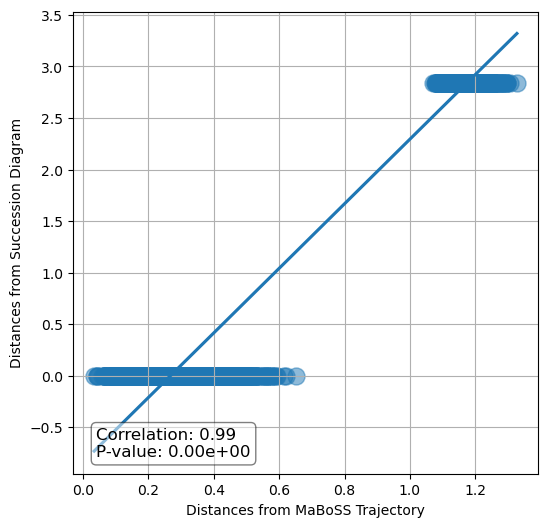

In [17]:
from scipy.stats import pearsonr

# Extract the upper triangular parts of the distance matrices (excluding the diagonal)
distance_matrix = distance_matrix.loc[model_name, model_name]
distances_1 = distance_matrix.where(np.triu(np.ones(distance_matrix.shape, dtype='bool'), k=1)).stack()

distance_matrix_2 = distance_matrix_2.loc[model_name, model_name]
distances_2 = distance_matrix_2.where(np.triu(np.ones(distance_matrix_2.shape, dtype='bool'), k=1)).stack()

# Compute the correlation and p-value
correlation, p_value = pearsonr(distances_1.values, distances_2.values)

# Print the correlation and p-value
print(f"Correlation between the two distance matrices: {correlation}")
print(f"P-value: {p_value}")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(6, 6))
sns.regplot(x=distances_1.values, y=distances_2.values, scatter_kws={'s': 150, 'alpha': 0.5})
plt.xlabel("Distances from MaBoSS Trajectory")
plt.ylabel("Distances from Succession Diagram")
plt.grid(True)

# Add a box label with correlation and p-value
plt.text(
    0.05, 0.1, 
    f"Correlation: {correlation:.2f}\nP-value: {p_value:.2e}", 
    transform=plt.gca().transAxes, 
    fontsize=12, 
    verticalalignment='top', 
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.5)
)

plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/BonesisTutorial_distCorr.pdf')

plt.show()

plt.close()

# Create logic function matrix
In this part of the script, we load models' logic function into a matrix. This matrix can then be transformed into a Disjunctive Normal Form (DNF) which allow us to identify clause of components that can activate each node. 

In [19]:
model.create_logic()
model.logic.model_logic
model.logic.create_flattend_logic_clause()

Loading models logics


100%|██████████| 1025/1025 [00:31<00:00, 32.32it/s]


Concatenate results into matrix


100%|██████████| 1025/1025 [00:01<00:00, 584.52it/s]

Logic object created
Flatten models logic clauses



100%|██████████| 1025/1025 [00:00<00:00, 2902877.52it/s]


Concatenate results into matrix


100%|██████████| 1025/1025 [00:02<00:00, 436.56it/s]

Flattend logic clause created


PCA calculated


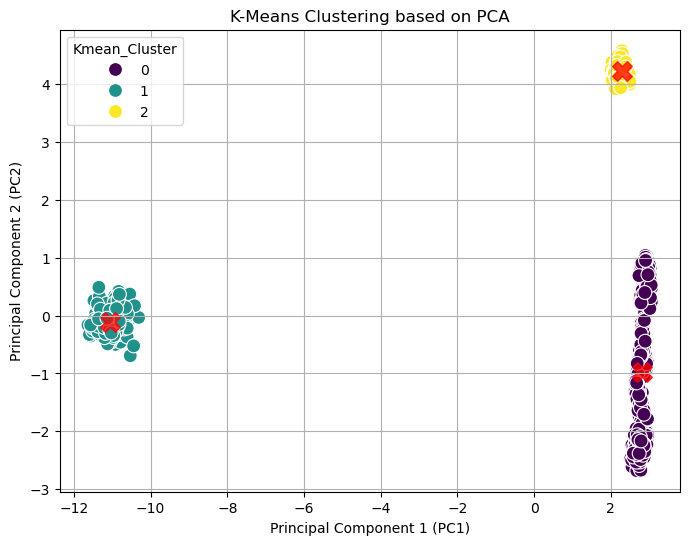

In [21]:
model.logic.calculate_logic_pca()
model.logic.calculate_kmean_cluster(num_cluster = 3)

In [ ]:
model.trajectory.calculate_kmean_cluster(n_cluster=3,

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0      0.749328  0.864596 -0.119709 -0.245490 -0.059438  0.092976  0.038249   
1      0.545456  0.589613  0.215938  0.157719  0.009869  0.071177  0.051238   
2      0.443589  0.409907  0.363676  0.250038  0.057378  0.067268  0.077030   
3      0.371511  0.256919  0.415315  0.224048  0.082287  0.067316  0.064086   
4      0.321596  0.117749  0.427403  0.150969  0.084357  0.066101  0.049696   
...         ...       ...       ...       ...       ...       ...       ...   
20495 -0.056393 -0.232442 -0.184240 -0.032008 -0.018296  0.012412  0.015915   
20496 -0.057833 -0.230798 -0.185078 -0.032270 -0.019875  0.012481  0.016282   
20497 -0.060442 -0.229200 -0.184975 -0.032753 -0.021782  0.012340  0.015690   
20498 -0.063307 -0.228076 -0.185379 -0.033319 -0.023613  0.011984  0.015819   
20499 -0.065290 -0.226328 -0.186452 -0.034184 -0.024844  0.013124  0.015456   

            pc8       pc9      pc10      model_id  timepoint kmean_cluster  
0      0.002500 -0.036880 -0.023496  Invasion_532        0.0             2  
1     -0.007169 -0.136575  0.100831  Invasion_532        1.0             2  
2      0.003762 -0.104030  0.091835  Invasion_532        2.0             2  
3      0.007866 -0.051964  0.058300  Invasion_532        3.0             2  
4      0.014837 -0.018768  0.021764  Invasion_532        4.0             2  
...         ...       ...       ...           ...        ...           ...  
20495 -0.004120  0.007368  0.015507  Invasion_799       15.0             0  
20496 -0.004714  0.007831  0.016471  Invasion_799       16.0             0  
20497 -0.004921  0.007622  0.016218  Invasion_799       17.0             0  
20498 -0.005255  0.008078  0.016855  Invasion_799       18.0             0  
20499 -0.006240  0.008575  0.017877  Invasion_799       19.0             0  

[20500 rows x 13 columns]

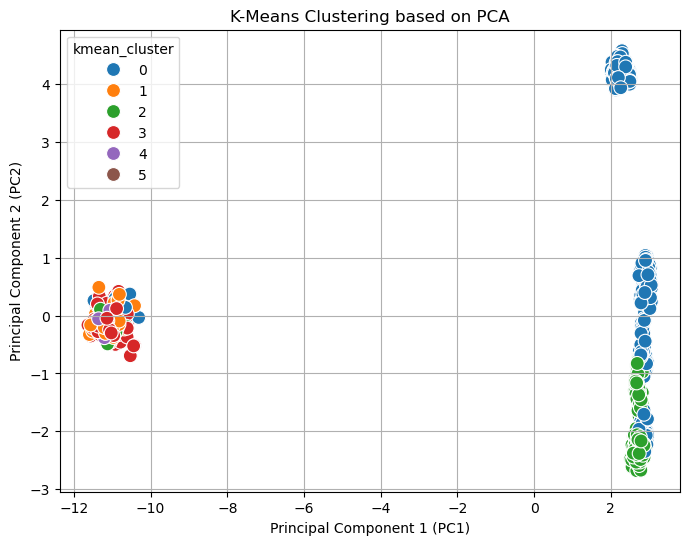

In [93]:
from sklearn.cluster import KMeans

# Assume k=2 (you can choose a different number based on the Elbow Method)
pca_df = model.logic.pca_df
pca_df['kmean_cluster'] = pca_df.index.map(model.trajectory.cluster_dict)

plt.figure(figsize=(8, 6))
# Scatter plot colored by cluster
sns.scatterplot(x='pc1', y='pc2', hue='kmean_cluster', data=pca_df, palette='tab10', s=100)
# Add title and labels
plt.title('K-Means Clustering based on PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
# Display the plot
plt.grid(True)
plt.show()

In [22]:
from sklearn.preprocessing import OrdinalEncoder
model_cluster = pd.Series(model.logic.pca_df.Kmean_Cluster)
model_logic = model.logic.model_logic

var_logic_clust = pd.DataFrame()
for i in list(model_cluster.unique()):
    model_logic_sub = model_logic.transpose().loc[list(model_cluster.index[model_cluster == i])]
    #model_logic_sub = model_logic_sub.drop(['logic_cluster'], axis = 1)
    var_logic_length = []
    for j in model_logic_sub.columns:
        num_logic = model_logic_sub[j].value_counts().size
        var_logic_length.append(num_logic)
    var_logic_length = pd.DataFrame(var_logic_length, columns = ['logic_length'], index = model_logic_sub.columns)
    var_logic_clust = pd.concat([var_logic_clust, var_logic_length], axis = 1, ignore_index = False)
var_logic_clust.columns = list(model_cluster.unique())

model_logic_t= model_logic.transpose()

# Ordinal encoding
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(model_logic_t)
encoded_df = pd.DataFrame(encoded_data, columns=model_logic_t.columns)

sort_index = encoded_df.max().sort_values().index

var_logic_clust= var_logic_clust.loc[sort_index] 

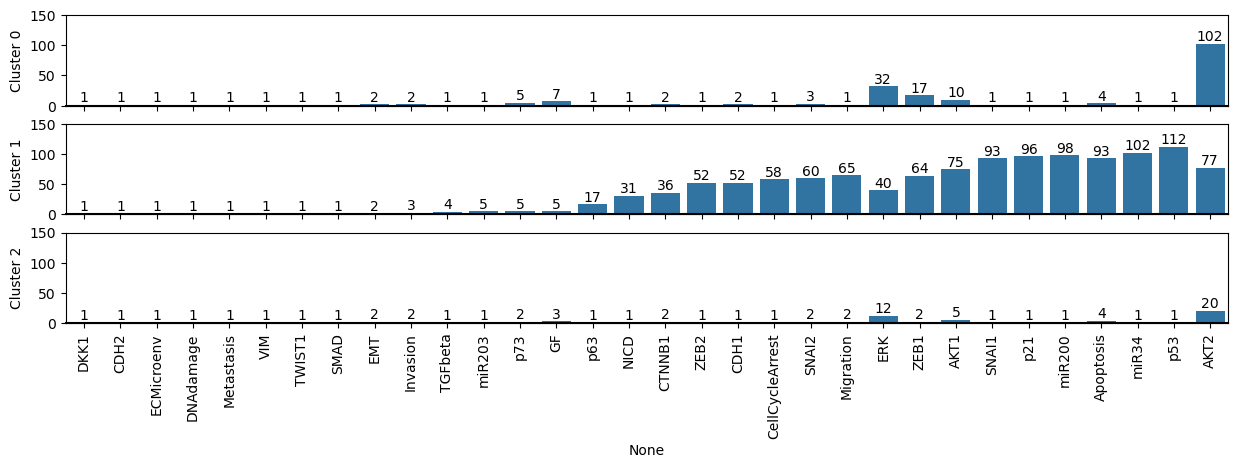

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(15, 4), sharex=True)
plt.ylim(0, 65)

for i in range(3):
    sns.barplot(x=var_logic_clust.index, y=var_logic_clust[i], ax=axes[i])
    axes[i].axhline(0, color="k", clip_on=False)
    axes[i].set_ylabel(f"Cluster {i}")
    axes[i].bar_label(axes[i].containers[0], fontsize=10)
    axes[i].set_ylim(0, 150)

plt.xticks(rotation=90)
plt.show()

In [94]:
from scipy.stats import chi2_contingency

test = model.logic.logic_clause_flattend
test = test.transpose()
test['group'] = test.index.map(model.trajectory.cluster_dict)
# Assuming 'df' is a DataFrame with samples as rows and features as columns,
# and 'group' is a column indicating group membership.

# Step 1: Identify constant features.
constant_features = [col for col in test.columns if col != 'group' and test[col].nunique() == 1]

# Step 2 & 3: For non-constant features, perform chi-square test.
marker_features = []
varied_features = []

for col in tqdm(test.columns):
    if col == 'group' or col in constant_features:
        continue
    contingency_table = pd.crosstab(test[col], test['group'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p < 0.001:  # Adjust threshold as needed after multiple testing correction.
        marker_features.append(col)
    else:
        varied_features.append(col)

print("Constant features:", constant_features)
print("Varied but not markers:", varied_features)
print("Key marker features:", marker_features)

100%|██████████| 1309/1309 [00:05<00:00, 249.44it/s]

Constant features: ['CDH2_(TWIST1)', 'DKK1_(CTNNB1)', 'DKK1_(NICD)', 'DNAdamage_(DNAdamage)', 'ECMicroenv_(ECMicroenv)', 'Metastasis_(Migration)', 'SMAD_(TGFbeta & !miR200 & !miR203)', 'TWIST1_(CTNNB1)', 'TWIST1_(NICD)', 'TWIST1_(SNAI1)', 'VIM_(CTNNB1)', 'VIM_(ZEB2)']
Varied but not markers: ['ZEB1_(NICD & TWIST1 & !miR200)', 'CDH1_(!AKT2 & !TWIST1 & !ZEB1 & !ZEB2)', 'Migration_(EMT & ERK & Invasion & VIM & !miR200)', 'miR200_(!SNAI1 & !SNAI2 & !ZEB1 & p53)', 'AKT2_(CDH2 & GF & !miR203 & !miR34 & !p53)', 'ERK_(CDH2 & SMAD)', 'ERK_(GF & NICD & SMAD)', 'AKT2_(CDH2 & NICD & TGFbeta & !p53)', 'AKT1_(!CDH1 & CTNNB1 & GF & NICD & TGFbeta & !p53)', 'AKT2_(CDH2 & TWIST1 & !p53)', 'AKT2_(GF & NICD & TGFbeta & !miR203 & !miR34)', 'CDH1_(!AKT2 & !SNAI1 & !TWIST1 & !ZEB1 & !ZEB2)', 'ZEB2_(NICD & SNAI1)', 'miR200_(!AKT2 & !SNAI1 & !SNAI2 & p63)', 'p21_(!AKT1 & !ERK & NICD)', 'p21_(AKT2 & NICD & p53 & p63)', 'p21_(!ERK & NICD & p73)', 'p21_(SMAD & p63 & p73)', 'AKT2_(TWIST1 & !miR34 & !p53)', 'AKT1_

In [96]:
test.sort_values(by = 'group')

AKT1_(!CDH1 & CDH2 & CTNNB1 & GF)  \
Invasion_702                                 1.0   
Invasion_882                                 1.0   
Invasion_885                                 1.0   
Invasion_1002                                1.0   
Invasion_657                                 1.0   
...                                          ...   
Invasion_80                                  0.0   
Invasion_248                                 0.0   
Invasion_75                                  0.0   
Invasion_30                                  0.0   
Invasion_31                                  0.0   

               AKT1_(!CDH1 & CDH2 & CTNNB1 & NICD)  \
Invasion_702                                   1.0   
Invasion_882                                   1.0   
Invasion_885                                   1.0   
Invasion_1002                                  1.0   
Invasion_657                                   1.0   
...                                            ...   
Invasion_80                                    0.0   
Invasion_248                                   0.0   
Invasion_75                                    0.0   
Invasion_30                                    0.0   
Invasion_31                                    0.0   

               AKT1_(!CDH1 & CDH2 & CTNNB1 & !miR34)  \
Invasion_702                                     1.0   
Invasion_882                                     1.0   
Invasion_885                                     1.0   
Invasion_1002                                    1.0   
Invasion_657                                     1.0   
...                                              ...   
Invasion_80                                      0.0   
Invasion_248                                     0.0   
Invasion_75                                      0.0   
Invasion_30                                      0.0   
Invasion_31                                      0.0   

               AKT1_(!CDH1 & CDH2 & CTNNB1 & !p53)  \
Invasion_702                                   1.0   
Invasion_882                                   1.0   
Invasion_885                                   1.0   
Invasion_1002                                  1.0   
Invasion_657                                   1.0   
...                                            ...   
Invasion_80                                    0.0   
Invasion_248                                   0.0   
Invasion_75                                    0.0   
Invasion_30                                    0.0   
Invasion_31                                    0.0   

               AKT1_(!CDH1 & CTNNB1 & GF & NICD & !miR34 & !p53)  \
Invasion_702                                                 1.0   
Invasion_882                                                 1.0   
Invasion_885                                                 1.0   
Invasion_1002                                                1.0   
Invasion_657                                                 1.0   
...                                                          ...   
Invasion_80                                                  0.0   
Invasion_248                                                 0.0   
Invasion_75                                                  0.0   
Invasion_30                                                  0.0   
Invasion_31                                                  0.0   

               AKT1_(!CDH1 & CTNNB1 & TGFbeta)  \
Invasion_702                               1.0   
Invasion_882                               1.0   
Invasion_885                               1.0   
Invasion_1002                              1.0   
Invasion_657                               1.0   
...                                        ...   
Invasion_80                                0.0   
Invasion_248                               1.0   
Invasion_75                                0.0   
Invasion_30                                0.0   
Invasion_31                                0.0   

 

In [116]:
# Create a color palette for the groups
unique_groups = test['group'].unique()
palette = sns.color_palette("tab10", len(unique_groups))
group_colors = test['group'].map(dict(zip(unique_groups, palette)))
test = test.sort_values(by = 'group')

# Create the clustermap with row colors
sns.clustermap(test[constant_features + varied_features + marker_features], 
               cmap='viridis', row_cluster=False, col_cluster=False, figsize=(20, 12),
               xticklabels=False, yticklabels=False, row_colors=group_colors)
plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/Invasion_feature_plot.png', dpi = 500)
plt.close()

In [86]:
from scipy.stats import chi2_contingency

test = model.logic.logic_clause_flattend
test = test.transpose()
test['group'] = test.index.map(model.trajectory.cluster_dict)
test_sub = test[test.group.isin([2,0])]
# Assuming 'df' is a DataFrame with samples as rows and features as columns,
# and 'group' is a column indicating group membership.

# Step 1: Identify constant features.
constant_features = [col for col in test.columns if col != 'group' and test_sub[col].nunique() == 1]

# Step 2 & 3: For non-constant features, perform chi-square test.
marker_features = []
varied_features = []

for col in tqdm(test_sub.columns):
    if col == 'group' or col in constant_features:
        continue
    contingency_table = pd.crosstab(test_sub[col], test_sub['group'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p < 0.001:  # Adjust threshold as needed after multiple testing correction.
        marker_features.append(col)
    else:
        varied_features.append(col)

print("Constant features:", constant_features)
print("Varied but not markers:", varied_features)
print("Key marker features:", marker_features)

100%|██████████| 1309/1309 [00:02<00:00, 474.38it/s] 

Constant features: ['CDH2_(TWIST1)', 'DKK1_(CTNNB1)', 'DKK1_(NICD)', 'DNAdamage_(DNAdamage)', 'ECMicroenv_(ECMicroenv)', 'Metastasis_(Migration)', 'SMAD_(TGFbeta & !miR200 & !miR203)', 'TWIST1_(CTNNB1)', 'TWIST1_(NICD)', 'TWIST1_(SNAI1)', 'VIM_(CTNNB1)', 'VIM_(ZEB2)', 'AKT2_(CDH2 & NICD & TGFbeta & TWIST1 & !miR203 & !miR34 & !p53)', 'CDH1_(!AKT2 & !TWIST1 & !ZEB1 & !ZEB2)', 'Migration_(AKT2 & Invasion & !p63)', 'Migration_(EMT & ERK & Invasion & VIM & !miR200)', 'SNAI1_(TWIST1 & !miR34)', 'ZEB2_(TWIST1 & !miR200 & !miR203)', 'ZEB2_(NICD & SNAI1 & SNAI2)', 'miR200_(!SNAI1 & !SNAI2 & !ZEB1 & p53)', 'miR34_(!AKT1 & AKT2 & !SNAI1 & !ZEB1 & !ZEB2 & p53 & !p63 & p73)', 'p21_(!ERK & NICD)', 'Apoptosis_(!AKT1 & !ERK & miR200)', 'Apoptosis_(!ZEB2 & miR34 & p53 & p63 & p73)', 'CTNNB1_(!AKT1 & !CDH1 & !CDH2 & !miR34 & !p53 & !p63)', 'CTNNB1_(!CDH1 & !CDH2 & !miR200)', 'miR200_(!AKT2 & !ZEB1 & !ZEB2 & p53)', 'miR200_(!SNAI1 & !SNAI2 & p63 & p73)', 'p21_(!AKT1 & NICD & SMAD & p63)', 'p53_(!AKT1 & 

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


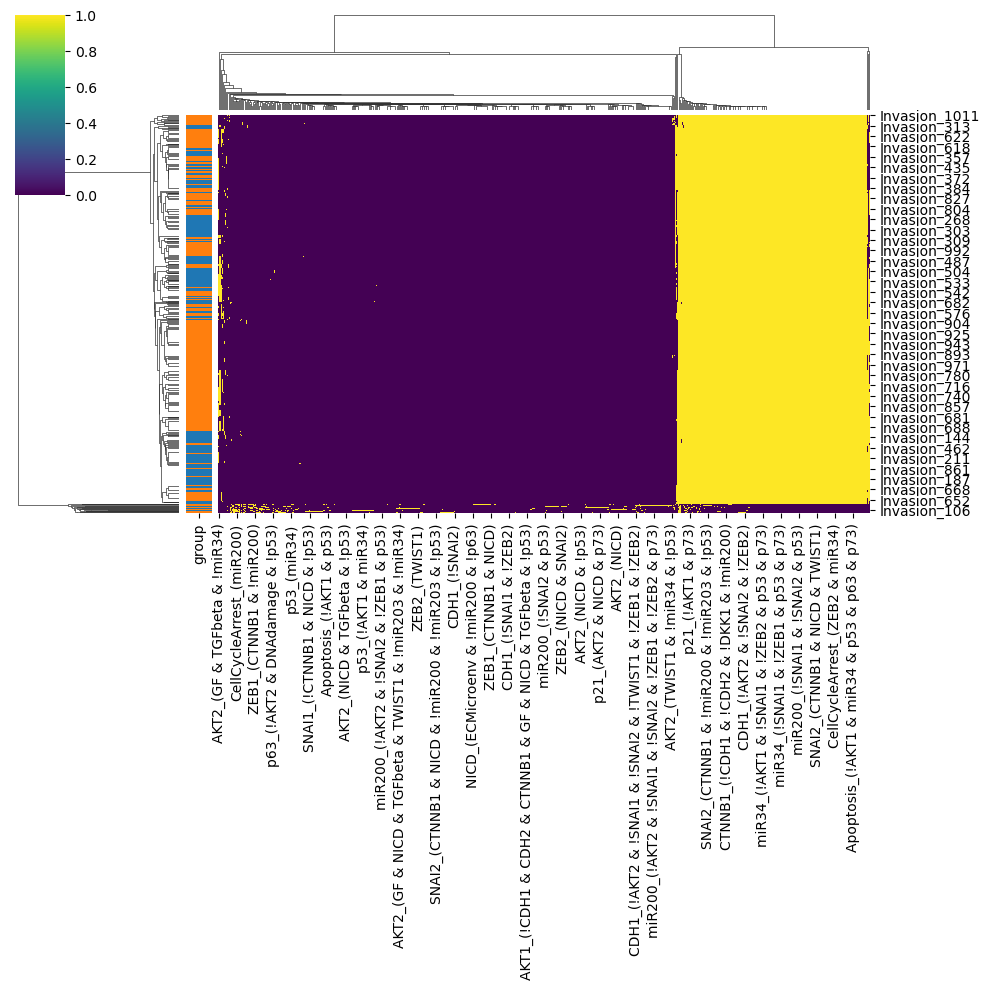

In [89]:
# Create a color palette for the groups
unique_groups = test_sub['group'].unique()
palette = sns.color_palette("tab10", len(unique_groups))
group_colors = test_sub['group'].map(dict(zip(unique_groups, palette)))

# Create the clustermap with row colors
sns.clustermap(test_sub[varied_features], cmap='viridis', figsize=(10, 10), row_colors=group_colors)

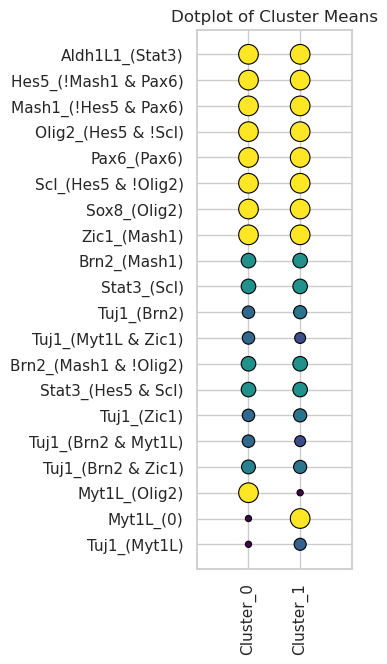

In [49]:
model_cluster = pd.Series(model.trajectory.cluster_dict)
test = model.logic.logic_clause_flattend
result_df = pd.DataFrame()

for cluster in model.trajectory.cluster_dict.values():
    cluster_id = [key for key, value in model.trajectory.cluster_dict.items() if value == cluster]
    cluster_mtx = test.loc[:, test.columns.isin(cluster_id)]
    cluster_mean = cluster_mtx.mean(axis=1)
    result_df[f'Cluster_{cluster}'] = cluster_mean

# Convert the result_df to a long format for easier plotting with seaborn
result_df = result_df.loc[constant_features + varied_features + marker_features,:]
result_long_df = result_df.reset_index().melt(id_vars='index', var_name='Cluster', value_name='Value')

# Create the dot plot
plt.figure(figsize=(2, 7))
sns.set_theme(style="whitegrid")
dotplot = sns.scatterplot(data=result_long_df, 
                          x=pd.Categorical(result_long_df['Cluster'], categories=['Cluster_0', 'Cluster_1'], ordered=True), 
                          y='index', 
                          size='Value', hue='Value', 
                          palette='viridis', sizes=(20, 200), legend=None,
                          edgecolor='black', linewidth=0.8)

# Customize the plot
plt.title('Dotplot of Cluster Means')
#plt.xlabel('Cluster')
plt.ylabel(None)
plt.xticks(rotation=90)
plt.xlim(-1,2)
plt.savefig('/home/spankaew/Git/astrologics/figures/BonesisTutorial_traj_dotplot.pdf', bbox_inches='tight')

plt.show()
plt.close()

SD networks clustered


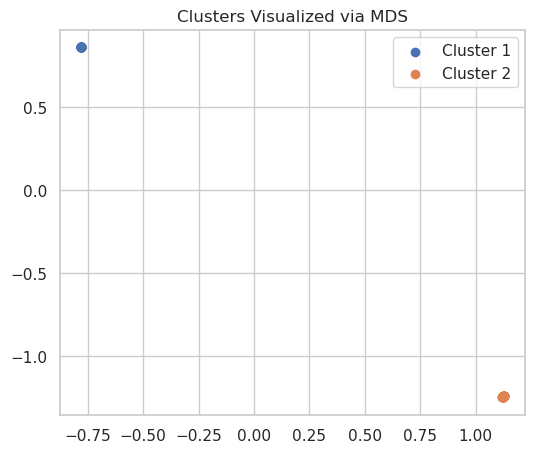

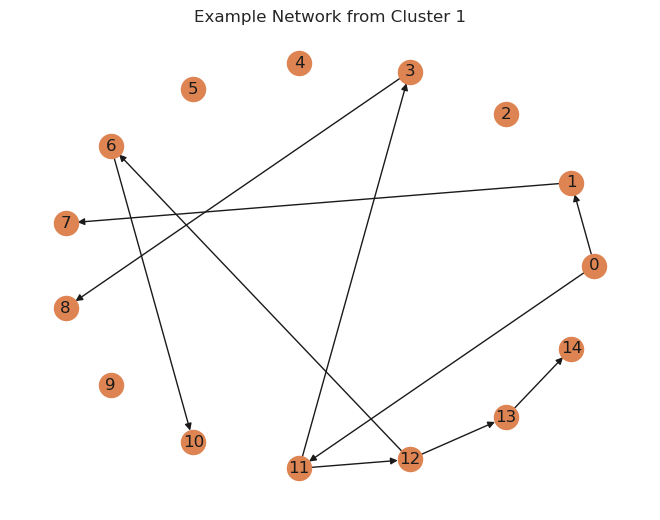

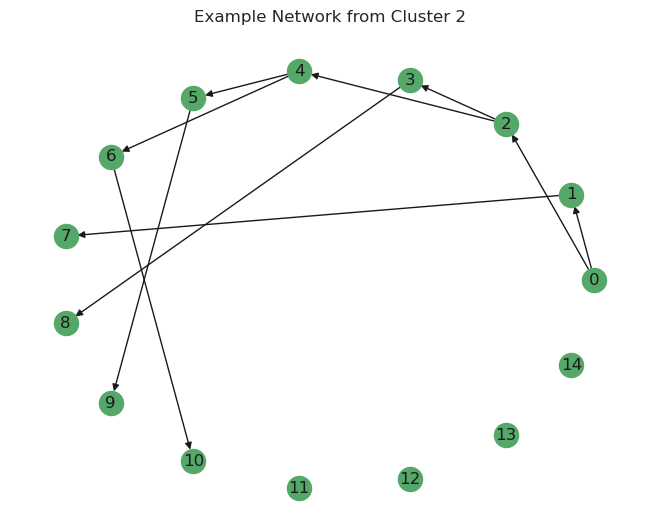

In [43]:
model.succession_diagram.cluster_sdnet(n_cluster = 2)
model.succession_diagram.plot_sdnet_cluster()

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [46]:
model_cluster

bn0     1
bn1     1
bn10    0
bn11    0
bn12    1
       ..
bn84    0
bn85    0
bn86    0
bn87    0
bn9     1
Length: 88, dtype: int64

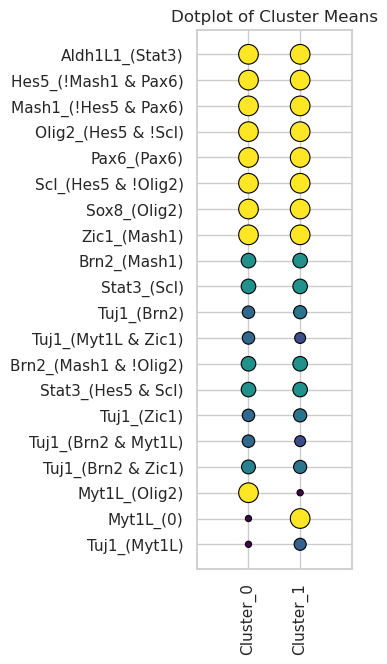

In [47]:
model_cluster = pd.Series(model.succession_diagram.clusters)

result_df = pd.DataFrame()

for cluster in model.trajectory.cluster_dict.values():
    cluster_id = [key for key, value in model.trajectory.cluster_dict.items() if value == cluster]
    cluster_mtx = test.loc[:, test.columns.isin(cluster_id)]
    cluster_mean = cluster_mtx.mean(axis=1)
    result_df[f'Cluster_{cluster}'] = cluster_mean

# Convert the result_df to a long format for easier plotting with seaborn
result_df = result_df.loc[constant_features + varied_features + marker_features,:]
result_long_df = result_df.reset_index().melt(id_vars='index', var_name='Cluster', value_name='Value')

# Create the dot plot
plt.figure(figsize=(2, 7))
sns.set_theme(style="whitegrid")
dotplot = sns.scatterplot(data=result_long_df, 
                          x=pd.Categorical(result_long_df['Cluster'], categories=['Cluster_0', 'Cluster_1'], ordered=True), 
                          y='index', 
                          size='Value', hue='Value', 
                          palette='viridis', sizes=(20, 200), legend=None,
                          edgecolor='black', linewidth=0.8)

# Customize the plot
plt.title('Dotplot of Cluster Means')
#plt.xlabel('Cluster')
plt.ylabel(None)
plt.xticks(rotation=90)
plt.xlim(-1,2)
plt.show()

plt.savefig('/home/spankaew/Git/astrologics/figures/BonesisTutorial_traj_dotplot.pdf')
plt.close()